In [1]:
import numpy as np
import bw2speedups
from matplotlib import pyplot as plt
from scipy.stats import norm
from bw_temporalis import TemporalDistribution, easy_datetime_distribution, easy_timedelta_distribution

In [8]:
np.array(1, dtype="timedelta64[Y]").astype("timedelta64[D]")

array(365, dtype='timedelta64[D]')

In [3]:
from bw_temporalis.utils import normalized_d


In [6]:
float('foo')

ValueError: could not convert string to float: 'foo'

In [5]:
normalized_data_array(5, "triangular", None)

array([0.66666667, 1.33333333, 2.        , 1.33333333, 0.66666667])

In [149]:
start = np.array("2023-04-20", dtype="datetime64[s]").astype(int)
end = np.array("2023-04-24", dtype="datetime64[s]").astype(int)
dates = np.linspace(start, end, 50).astype("datetime64[s]")
total = 10

In [185]:
def normalized_data_array(steps: int, kind: str, param: float | None) -> npt.NDArray[int]:
    if kind == "uniform":
        return np.ones(steps)
    elif kind == "triangular":
        # Zero probability at bounds
        return triang.pdf(np.linspace(1/(steps * 2), 1 - 1/(steps * 2), steps), c=float(param) if param is not None else 0.5)
    elif kind == "normal":
        if param is None:
            raise Value("Standard deviation (`param`) is required for Normal distribution")
        return norm.pdf(np.linspace(-0.5, 0.5, steps), scale=param)
    elif kind == "lognormal":
        if param is None:
            raise Value("Standard deviation (`param`) is required for Lognormal distribution")
        # Undefined at zero
        return lognorm.pdf(np.linspace(0.5, 2, steps), s=param)
    else:
        raise ValueError(f"Unrecognized array kind {kind}")


def easy_datetime_array(start: str, end: str, total: float, steps: int | None = 50, kind: str | None = "uniform", param: float | None = None) -> TemporalDistribution:
    start = np.array(start, dtype="datetime64[s]").astype(int)
    end = np.array(end, dtype="datetime64[s]").astype(int)
    date = np.linspace(start, end, steps).astype("datetime64[s]")
    amount = normalized_data_array(steps, kind, param)
    amount *= total / amount.sum()
    return TemporalDistribution(date=date, amount=amount)


In [2]:
td = easy_datetime_distribution("2023-04-20", "2023-04-28", 10, kind="triangular", param="2023-04-22")

<Axes: xlabel='Date', ylabel='Amount'>

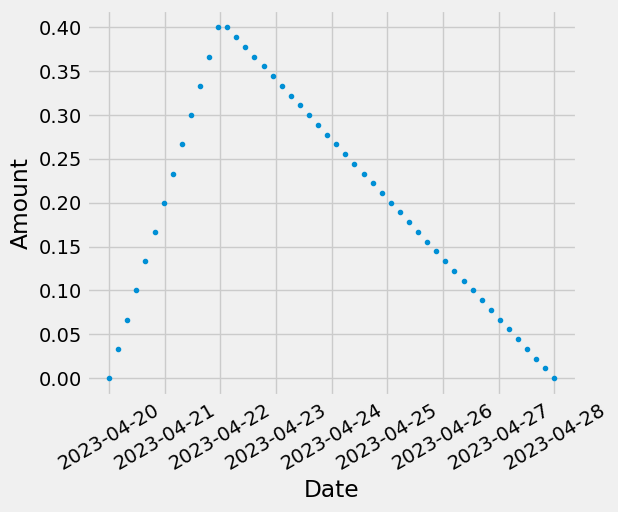

In [3]:
td.graph()

In [5]:
td = easy_timedelta_distribution(-50, 50, steps=20, total=10, resolution="h", kind="normal", param=0.2)

<Axes: xlabel='Time (seconds)', ylabel='Amount'>

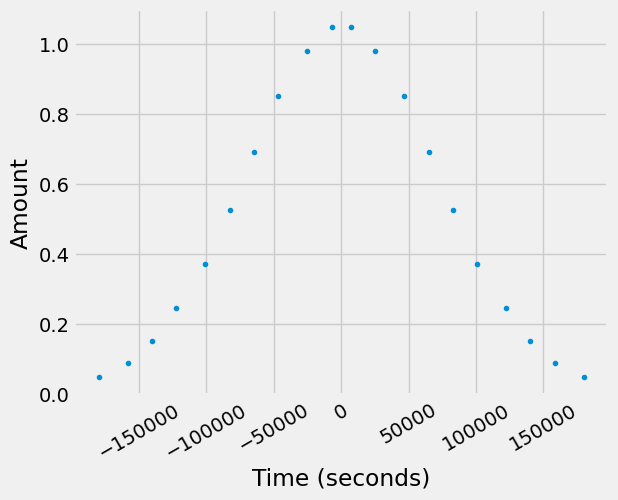

In [7]:
td.graph()

In [30]:
def speedups(first_date, other_date, first_amount, other_amount):
    date = (first_date.reshape((-1, 1)) + other_date.reshape((1, -1))).ravel()
    amount = (
        first_amount.reshape((-1, 1)) * other_amount.reshape((1, -1))
    ).ravel()
    return bw2speedups.consolidate(date.view("int64"), amount)

In [194]:
a = np.array(np.linspace(-1000, 1000, 2000), dtype="timedelta64[s]")
first_date = np.array(['2023-04-22T16:00:00'], dtype="datetime64[s]")

In [195]:
first_date

array(['2023-04-22T16:00:00'], dtype='datetime64[s]')

In [196]:
False and "Foo" < 4

False

In [32]:
other_date = np.arange(1000, 5000, dtype="timedelta64[s]")

In [33]:
first_amount = np.random.random(size=2000)
other_amount = np.random.random(size=4000)

In [34]:
%timeit speedups(first_date, other_date, first_amount, other_amount)

15.7 s ± 227 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [82]:
def explode(first_date, other_date, first_amount, other_amount):
    date = (first_date.reshape((-1, 1)) + other_date.reshape((1, -1))).ravel()
    amount = (
        first_amount.reshape((-1, 1)) * other_amount.reshape((1, -1))
    ).ravel()

In [83]:
%timeit explode(first_date, other_date, first_amount, other_amount)

16.1 ms ± 214 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
def speedups_convolve(date, amount):
    return bw2speedups.consolidate(date.view("int64"), amount)

In [43]:
%timeit speedups_convolve(date, amount)

15.9 s ± 310 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [75]:
from scipy.sparse import csr_array

In [50]:
from scipy.signal import convolve

In [87]:
date.dtype in {np.dtype("datetime64[s]")}

True

In [76]:
def as_matrix(date, amount):
    matrix = csr_array((aamount, (np.zeros_like(date), date)), shape=(1, date.max() + 1))
    matrix = matrix.tocsr().tocoo()
    return matrix.col, matrix.data

In [77]:
as_matrix(
    np.array([1682639998, 1682639999, 1682640000, 1682640000]),
    np.ones(4)
)

(array([1682639998, 1682639999, 1682640000], dtype=int32), array([1., 1., 2.]))

In [80]:
date.astype('int64')[:10]

array([1682640000, 1682640001, 1682640002, 1682640003, 1682640004,
       1682640005, 1682640006, 1682640007, 1682640008, 1682640009])

In [71]:
date.dtype, amount.dtype

(dtype('<M8[s]'), dtype('float64'))

In [102]:
a = np.random.normal(100, 50, size=10_000).astype(np.int64)

In [118]:
a = np.array("2022-05-05", dtype="datetime64[D]").astype(int)
b = np.array("2022-05-15", dtype="datetime64[D]").astype(int)
np.linspace(a, b, 10).astype("datetime64[D]")

array(['2022-05-05', '2022-05-06', '2022-05-07', '2022-05-08',
       '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
       '2022-05-13', '2022-05-15'], dtype='datetime64[D]')

In [103]:
a.min()

-112

In [111]:
import math

In [112]:
a = np.array([4.5])
b = 4.485

In [114]:
%timeit math.isclose(a, b, rel_tol=0.01)

69.5 ns ± 3.98 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [115]:
%timeit np.allclose(a, b, rtol=0.01)

12 µs ± 25.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [104]:
def check_then_offset(a):
    offset = False
    if a.min() < 0:
        a += 1_000_000
        offset = True
    if offset:
        a -= 1_000_000
    return a

In [105]:
def always_offset(a):
    a += 1_000_000
    a -= 1_000_000
    return a

In [108]:
%timeit check_then_offset(a)

4.31 µs ± 44.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [109]:
%timeit always_offset(a)

2.72 µs ± 6.94 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [90]:
date

array(['2023-04-28T00:00:00', '2023-04-28T00:00:01',
       '2023-04-28T00:00:02', ..., '2023-04-28T01:39:57',
       '2023-04-28T01:39:58', '2023-04-28T01:39:59'],
      dtype='datetime64[s]')

In [91]:
2147483647 / 60 / 60 / 24 / 365

68.09625973490614

In [92]:
9223372036854775807 / 60 / 60 / 24 / 365

292471208677.536

In [93]:
1_000_000 * 60 * 60 * 24 * 365

31536000000000

In [89]:
isinstance(date.dtype, np.datetime64)

False

In [81]:
%timeit as_matrix(date.astype('int64'), amount)

298 ms ± 3.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [74]:
%debug

> /Users/chrismutel/miniconda3/envs/bw25_graph_dev/lib/python3.10/site-packages/scipy/sparse/_sputils.py(308)<genexpr>()
    306             new_shape = tuple(operator.index(arg) for arg in shape_iter)
    307     else:
--> 308         new_shape = tuple(operator.index(arg) for arg in args)
    309 
    310     if current_shape is None:



ipdb>  arg


1.0


ipdb>  q


In [36]:
a = np.array([-2, -1, 0, 1, 2], dtype="timedelta64[s]")
x = np.array(["2023-04-28"], dtype="datetime64[s]") + a
x.astype('int64')

array([1682639998, 1682639999, 1682640000, 1682640001, 1682640002])

In [37]:
c = np.array([-1, 0, 1], dtype="timedelta64[s]")

In [40]:
convolve(
    np.array([
        [1682639998, 1682639999, 1682640000],
        [1, 2, 3]
    ]),
    np.array([
        [-1, 0, 1],
        [10, 11, 12]
    ]).T,    
)

array([[-1682639998, 15143759981, 15143759990, 16826400000],
       [         -1, 18509039986, 18509040006, 18509040030],
       [ 1682639998, 21874319986, 21874320010, 20191680033],
       [          1,          14,          27,          36]])

In [15]:
np.convolve(a, c)

array([  0,  -2,  -5,  -8, -10, -10, -10, -10, -10, -10,  10,  22,  25,
        18], dtype=timedelta64)

In [17]:
np.convolve(a, b)

TypeError: Cannot cast array data from dtype('<m8[s]') to dtype('<M8[s]') according to the rule 'safe'